In [29]:
import pandas as pd
import os

# Directory containing the Excel files
directory = 'shared-data'

# List to hold data from each file
data_frames = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.xlsx') or filename.endswith('.xls') or filename.endswith('csv'):
        file_path = os.path.join(directory, filename)
        # Read the Excel file
        if filename.endswith('.csv'):
            df = pd.read_csv(file_path)
        else:
            df = pd.read_excel(file_path, engine='openpyxl')
        # Append the DataFrame to the list
        data_frames.append(df)

# Concatenate all DataFrames
combined_df = pd.concat(data_frames, ignore_index=True)

# Display the combined DataFrame
print(combined_df)

              League        Date       HomeTeam      AwayTeam  HomeGoals  \
0       Bundesliga 2    28/07/93       Chemnitz   Wuppertaler        0.0   
1       Bundesliga 2    28/07/93        CZ Jena        Hertha        1.0   
2       Bundesliga 2    28/07/93  Hansa Rostock   Munich 1860        4.0   
3       Bundesliga 2    28/07/93        Homburg      St Pauli        2.0   
4       Bundesliga 2    28/07/93       Mannheim        F Koln        1.0   
...              ...         ...            ...           ...        ...   
433761     Super Lig  07/06/2023       Besiktas     Konyaspor        3.0   
433762     Super Lig  07/06/2023     Fenerbahce     Gaziantep        3.0   
433763     Super Lig  07/06/2023    Giresunspor   Antalyaspor        2.0   
433764     Super Lig  07/06/2023      Hatayspor   Galatasaray        0.0   
433765     Super Lig  07/06/2023   Istanbulspor  Umraniyespor        4.0   

        AwayGoals Result  
0             0.0      D  
1             1.0      D  
2     

Zugewiesen an: Murat Arikan

Anweisungen:  

• Berechne den Prozentsatz der Heimsiege pro Liga über die Jahre. 
                 
• Identifiziere Trends: Hat sich der Heimvorteil verändert? 
               
• Führe eine statistische Analyse durch (Mittelwert, Varianz, Trendanalyse). 
              
• Präsentiere die Ergebnisse in Tabellen oder Grafiken zur besseren Visualisierung.

In [30]:
# Basic Data Inspection

# Check the shape of the dataset (rows, columns)
print("Shape:", combined_df.shape)

# Show column names and types
print("\nColumn Info:")
print(combined_df.dtypes)

# Show first few rows
print("\nPreview:")
print(combined_df.head())

Shape: (433766, 7)

Column Info:
League        object
Date          object
HomeTeam      object
AwayTeam      object
HomeGoals    float64
AwayGoals    float64
Result        object
dtype: object

Preview:
         League      Date       HomeTeam     AwayTeam  HomeGoals  AwayGoals  \
0  Bundesliga 2  28/07/93       Chemnitz  Wuppertaler        0.0        0.0   
1  Bundesliga 2  28/07/93        CZ Jena       Hertha        1.0        1.0   
2  Bundesliga 2  28/07/93  Hansa Rostock  Munich 1860        4.0        0.0   
3  Bundesliga 2  28/07/93        Homburg     St Pauli        2.0        1.0   
4  Bundesliga 2  28/07/93       Mannheim       F Koln        1.0        1.0   

  Result  
0      D  
1      D  
2      H  
3      H  
4      D  


In [31]:
# Missing Values

# Check for missing values
print("\nMissing values per column:")
print(combined_df.isnull().sum())


Missing values per column:
League       0
Date         0
HomeTeam     0
AwayTeam     0
HomeGoals    0
AwayGoals    0
Result       0
dtype: int64


In [32]:
# Unique Values for Categorical Columns

# Check unique values for 'League' and 'Result'
print("\nUnique leagues:", combined_df['League'].unique())
print("Unique match results:", combined_df['Result'].unique())


Unique leagues: ['Bundesliga 2' 'Bundesliga' 'Serie A' 'Ligue 1' 'Eredivisie' 'La Liga'
 'English Championship' 'English Premier League' 'English League 2'
 'English League 1' 'Scottish Division 1' 'Liga Portugal'
 'Scottish Premier League' 'Greek Super League' 'Super Lig'
 'Jupiler League' 'Ligue 2' 'La Liga 2' 'Scottish Division 2'
 'Scottish Division 3' 'Serie B' 'English Conference']
Unique match results: ['D' 'H' 'A']


In [33]:
# Check for duplicate rows in the dataset
# This helps ensure no match is counted more than once
print("Duplicate rows:", combined_df.duplicated().sum())

Duplicate rows: 216883


In [34]:
# Check if 'Date' column was correctly parsed to datetime format
# This is important for extracting the 'year' later
print("\nDate column preview:")
print(combined_df['Date'].head())
print("Date column type:", combined_df['Date'].dtype)


Date column preview:
0    28/07/93
1    28/07/93
2    28/07/93
3    28/07/93
4    28/07/93
Name: Date, dtype: object
Date column type: object


In [35]:
# Check the unique values in the 'Result' column
# We expect only 'H' (home win), 'D' (draw), and 'A' (away win)
print("\nMatch result distribution:")
print(combined_df['Result'].value_counts())


Match result distribution:
Result
H    196232
A    121078
D    116456
Name: count, dtype: int64


1. Gibt es einen Heimvorteil beim Fußball?

In [36]:
# Calculate total number of matches
total_matches = combined_df.shape[0]

# Count match outcomes
home_wins = (combined_df['Result'] == 'H').sum()
away_wins = (combined_df['Result'] == 'A').sum()
draws = (combined_df['Result'] == 'D').sum()

# Calculate percentages
home_win_pct = (home_wins / total_matches) * 100
away_win_pct = (away_wins / total_matches) * 100
draw_pct = (draws / total_matches) * 100

# Display the results
print(f"Total matches: {total_matches}")
print(f"Home wins: {home_wins} ({home_win_pct:.2f}%)")
print(f"Away wins: {away_wins} ({away_win_pct:.2f}%)")
print(f"Draws: {draws} ({draw_pct:.2f}%)")

Total matches: 433766
Home wins: 196232 (45.24%)
Away wins: 121078 (27.91%)
Draws: 116456 (26.85%)


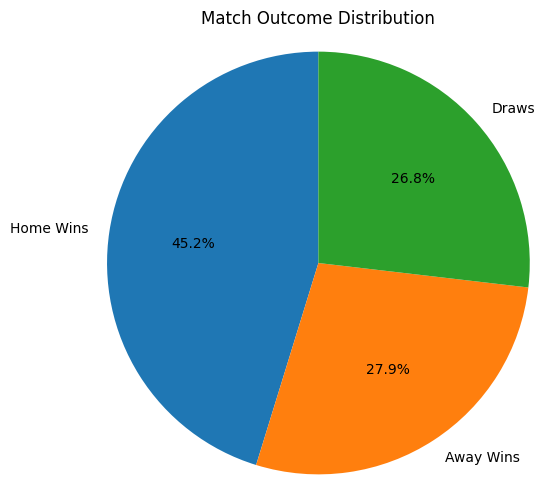

In [37]:
import matplotlib.pyplot as plt

# Labels and values
labels = ['Home Wins', 'Away Wins', 'Draws']
sizes = [home_win_pct, away_win_pct, draw_pct]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Match Outcome Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

„Die grafische Verteilung der Spielergebnisse zeigt, dass 45,2 % der Spiele von Heimteams gewonnen wurden, während 27,9 % durch Auswärtsteams gewonnen wurden.
Unentschieden machen 26,8 % der Spiele aus.

Dies verdeutlicht, dass Heimteams im Durchschnitt die häufigste Siegchance haben, jedoch ist der Unterschied zu Auswärtssiegen und Unentschieden nicht sehr groß.
Der Heimvorteil ist vorhanden, aber nicht dominant.“

2. Wie hat sich der Heimvorteil zwischen 1993 und 2023 verändert?

In [38]:
# Convert 'Date' column to datetime format (if not already done)
combined_df['Date'] = pd.to_datetime(combined_df['Date'], dayfirst=True)

# Extract 'Year' from 'Date'
combined_df['Year'] = combined_df['Date'].dt.year

C:\Users\arikanmurat\AppData\Local\Temp\ipykernel_188648\840270204.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Date'] = pd.to_datetime(combined_df['Date'], dayfirst=True)


In [39]:
# Extract the year from the datetime column
combined_df['Year'] = combined_df['Date'].dt.year

In [40]:
# Group by year and calculate total matches and home wins
yearly_stats = combined_df.groupby('Year').agg(
    total_matches=('Result', 'count'),
    home_wins=('Result', lambda x: (x == 'H').sum())
)

# Compute home win percentage per year
yearly_stats['home_win_percentage'] = (yearly_stats['home_wins'] / yearly_stats['total_matches']) * 100

# Show first few rows
print(yearly_stats.head())

      total_matches  home_wins  home_win_percentage
Year                                               
1993           4088       1952            47.749511
1994           9206       4370            47.469042
1995          11136       5254            47.180316
1996          12238       5766            47.115542
1997          13858       6662            48.073315


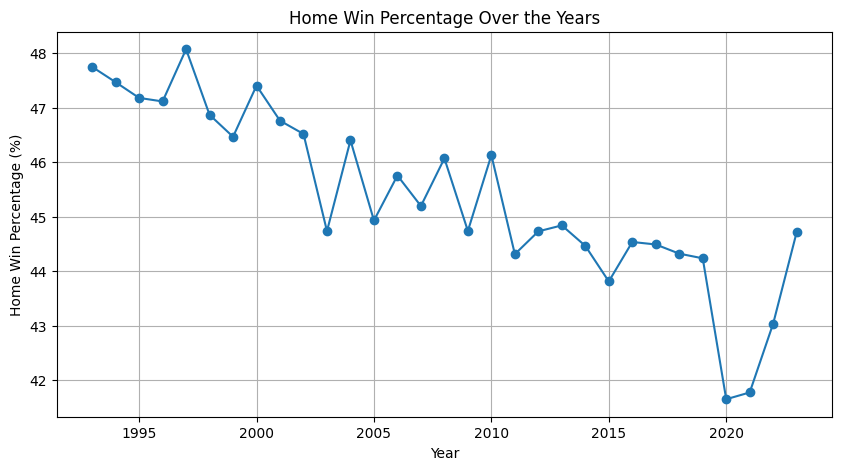

In [41]:
import matplotlib.pyplot as plt

# Plot line chart of home win percentage over the years
plt.figure(figsize=(10, 5))
plt.plot(yearly_stats.index, yearly_stats['home_win_percentage'], marker='o')
plt.title('Home Win Percentage Over the Years')
plt.xlabel('Year')
plt.ylabel('Home Win Percentage (%)')
plt.grid(True)
plt.show()

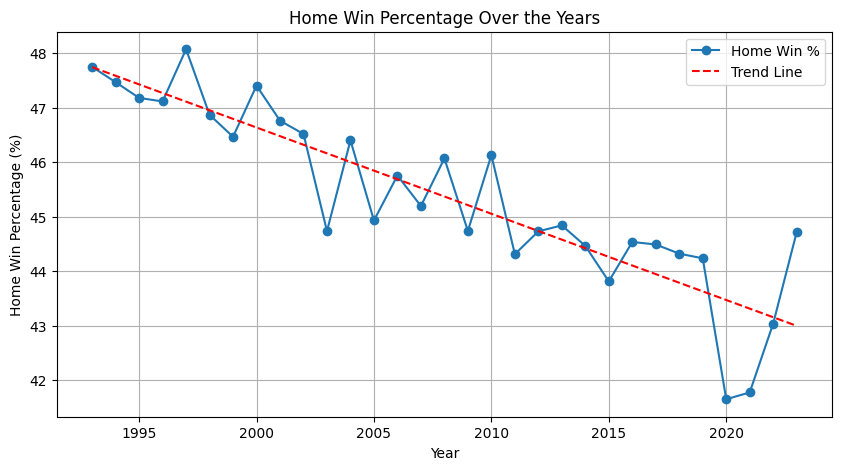

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare X (year) and Y (percentage)
years = yearly_stats.index
percentages = yearly_stats['home_win_percentage']

# Fit a linear trend line (1st degree polynomial)
z = np.polyfit(years, percentages, 1)
p = np.poly1d(z)

# Plot actual data
plt.figure(figsize=(10, 5))
plt.plot(years, percentages, marker='o', label='Home Win %')

# Plot trend line
plt.plot(years, p(years), linestyle='--', color='red', label='Trend Line')

# Labels and styling
plt.title('Home Win Percentage Over the Years')
plt.xlabel('Year')
plt.ylabel('Home Win Percentage (%)')
plt.grid(True)
plt.legend()
plt.show()

Statistische Auswertung

In [43]:
# Calculate mean and variance of home win percentages
mean_home_win = yearly_stats['home_win_percentage'].mean()
var_home_win = yearly_stats['home_win_percentage'].var()

print(f"Mean home win percentage: {mean_home_win:.2f}%")
print(f"Variance: {var_home_win:.2f}")

Mean home win percentage: 45.37%
Variance: 2.64


„Die durchschnittliche Heimsiegquote über die Jahre beträgt 45,37 %, was bedeutet, dass Heimteams im Schnitt etwa 45 von 100 Spielen gewinnen.
Das deutet auf einen gewissen Heimvorteil hin, jedoch ist dieser nicht sehr stark ausgeprägt.

Die Varianz beträgt lediglich 2,64, was auf eine hohe Stabilität des Heimvorteils im Zeitverlauf hinweist.
Die Heimsiegquote ist über die Jahre hinweg relativ konstant geblieben, ohne große Schwankungen.“

In [44]:
# Use the previously fitted trend line coefficients
slope = z[0]  # z comes from np.polyfit() in trend line plotting

print(f"Trend slope (change per year): {slope:.4f}")

Trend slope (change per year): -0.1582


„Die Trendanalyse ergibt eine negative Steigung von -0,1582 Prozentpunkten pro Jahr, was auf einen leicht rückläufigen Heimvorteil im Zeitverlauf hinweist.
Obwohl der Rückgang moderat ist, zeigt der Trend, dass Heimteams im Laufe der Jahre tendenziell seltener gewinnen als in der Vergangenheit.

In Kombination mit der stabilen Varianz lässt sich sagen:
Der Heimvorteil ist zwar konstant vorhanden, aber nimmt mit der Zeit allmählich ab.“

Lassen Sie uns diese Analyse nun auf Länderbasis durchführen

In [45]:
league_to_country = {
    'Bundesliga': 'Germany',
    'Bundesliga 2': 'Germany',
    
    'English Premier League': 'England',
    'English Championship': 'England',
    'English League 1': 'England',
    'English League 2': 'England',
    'English Conference': 'England',

    'La Liga': 'Spain',
    'La Liga 2': 'Spain',

    'Serie A': 'Italy',
    'Serie B': 'Italy',

    'Ligue 1': 'France',
    'Ligue 2': 'France',

    'Scottish Premier League': 'Scotland',
    'Scottish Division 1': 'Scotland',
    'Scottish Division 2': 'Scotland',
    'Scottish Division 3': 'Scotland',

    'Greek Super League': 'Greece',

    'Jupiler League': 'Belgium',

    'Liga Portugal': 'Portugal',

    'Eredivisie': 'Netherlands',

    'Super Lig': 'Turkey'
}

In [46]:
# Add a new column to identify the country of each match
combined_df['Country'] = combined_df['League'].map(league_to_country)

In [47]:
# Let's see the column we added
combined_df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Country
0,Bundesliga 2,1993-07-28,Chemnitz,Wuppertaler,0.0,0.0,D,1993,Germany
1,Bundesliga 2,1993-07-28,CZ Jena,Hertha,1.0,1.0,D,1993,Germany
2,Bundesliga 2,1993-07-28,Hansa Rostock,Munich 1860,4.0,0.0,H,1993,Germany
3,Bundesliga 2,1993-07-28,Homburg,St Pauli,2.0,1.0,H,1993,Germany
4,Bundesliga 2,1993-07-28,Mannheim,F Koln,1.0,1.0,D,1993,Germany


In [48]:
# Count match results per country
country_results = combined_df.groupby('Country')['Result'].value_counts().unstack().fillna(0)

# Optional: sort countries alphabetically
country_results = country_results.sort_index()

In [49]:
# Group by country and calculate counts
country_stats = combined_df.groupby('Country').agg(
    total_matches=('Result', 'count'),
    home_wins=('Result', lambda x: (x == 'H').sum()),
    away_wins=('Result', lambda x: (x == 'A').sum()),
    draws=('Result', lambda x: (x == 'D').sum())
)

# Calculate percentages
country_stats['home_win_pct'] = (country_stats['home_wins'] / country_stats['total_matches']) * 100
country_stats['away_win_pct'] = (country_stats['away_wins'] / country_stats['total_matches']) * 100
country_stats['draw_pct'] = (country_stats['draws'] / country_stats['total_matches']) * 100

# Sort by home_win_pct descending
country_stats_sorted = country_stats.sort_values(by='home_win_pct', ascending=False)

# Display rounded version
print(country_stats_sorted[['home_win_pct', 'away_win_pct', 'draw_pct']].round(2))

             home_win_pct  away_win_pct  draw_pct
Country                                          
Greece              49.68         26.14     24.18
Netherlands         47.54         29.04     23.42
Turkey              47.08         28.21     24.71
Belgium             46.92         28.83     24.25
Portugal            46.72         27.76     25.52
Germany             46.08         27.26     26.66
Spain               45.86         26.03     28.11
France              45.62         24.66     29.72
Italy               45.10         24.99     29.92
England             44.20         28.95     26.86
Scotland            42.67         33.24     24.09


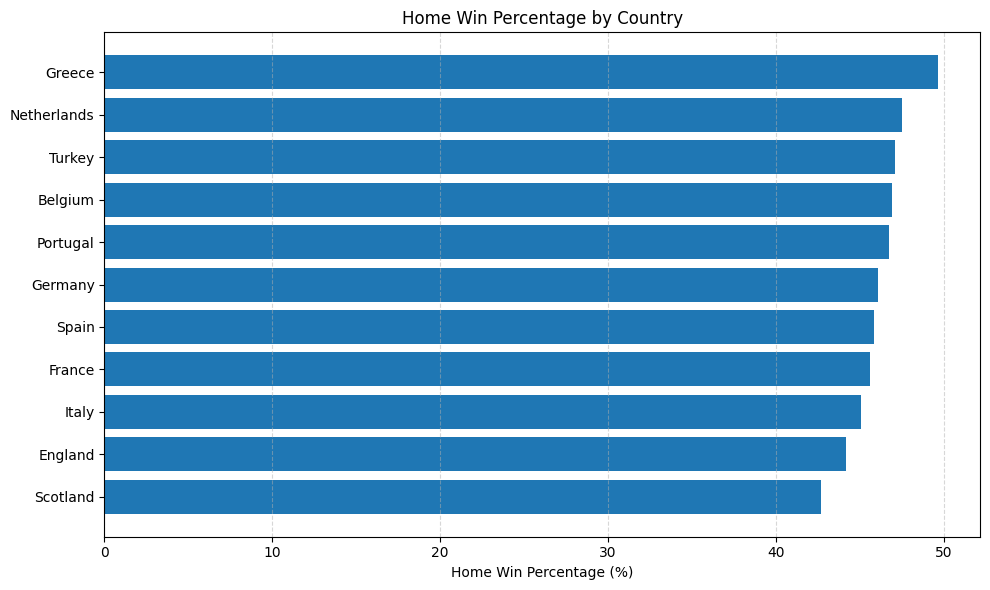

In [50]:
import matplotlib.pyplot as plt

# Get the sorted percentages again (you already have this as country_stats_sorted)
home_win_percents = country_stats_sorted['home_win_pct'].round(2)

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(home_win_percents.index, home_win_percents.values)
plt.xlabel('Home Win Percentage (%)')
plt.title('Home Win Percentage by Country')
plt.gca().invert_yaxis()  # Let the highest appear above
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Die Heimspielsiegquoten waren am niedrigsten in der schottischen Liga mit 42,67 % und am höchsten in der griechischen Liga mit 49,68 %.

In Ländern mit starkem Fußball nimmt der Heimvorteil ab, während er in Ländern mit vergleichsweise schwächerem Fußball zunimmt.

In [51]:
# Group by both Country and Year
country_year_stats = combined_df.groupby(['Country', 'Year']).agg(
    total_matches=('Result', 'count'),
    home_wins=('Result', lambda x: (x == 'H').sum())
)

# Calculate home win percentage
country_year_stats['home_win_percentage'] = (country_year_stats['home_wins'] / country_year_stats['total_matches']) * 100

# Reset index for easier plotting
country_year_stats = country_year_stats.reset_index()

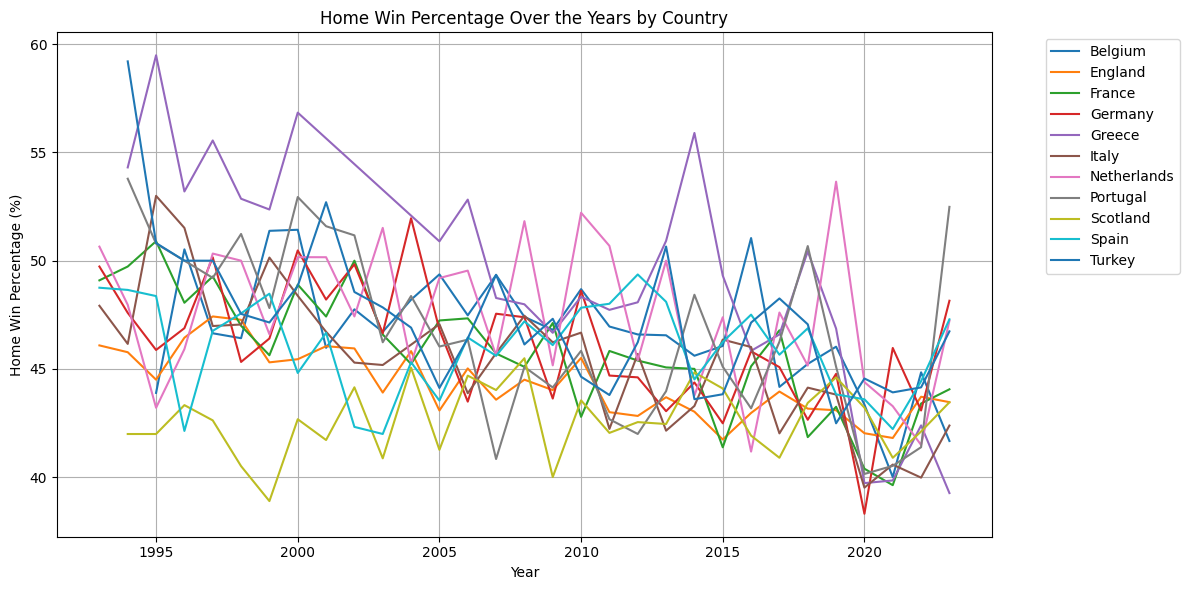

In [52]:
plt.figure(figsize=(12, 6))

# Loop through each country and plot its trend
for country in country_year_stats['Country'].unique():
    subset = country_year_stats[country_year_stats['Country'] == country]
    plt.plot(subset['Year'], subset['home_win_percentage'], label=country)

plt.title('Home Win Percentage Over the Years by Country')
plt.xlabel('Year')
plt.ylabel('Home Win Percentage (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
import numpy as np

# Prepare empty dictionary to hold slope values
country_trends = {}

# Loop through each country
for country in country_year_stats['Country'].unique():
    subset = country_year_stats[country_year_stats['Country'] == country]
    
    if len(subset) > 1:  # At least 2 years to calculate a trend
        years = subset['Year'].values
        percents = subset['home_win_percentage'].values
        
        # Fit linear model (1st degree polynomial)
        z = np.polyfit(years, percents, 1)
        slope = z[0]
        
        country_trends[country] = slope

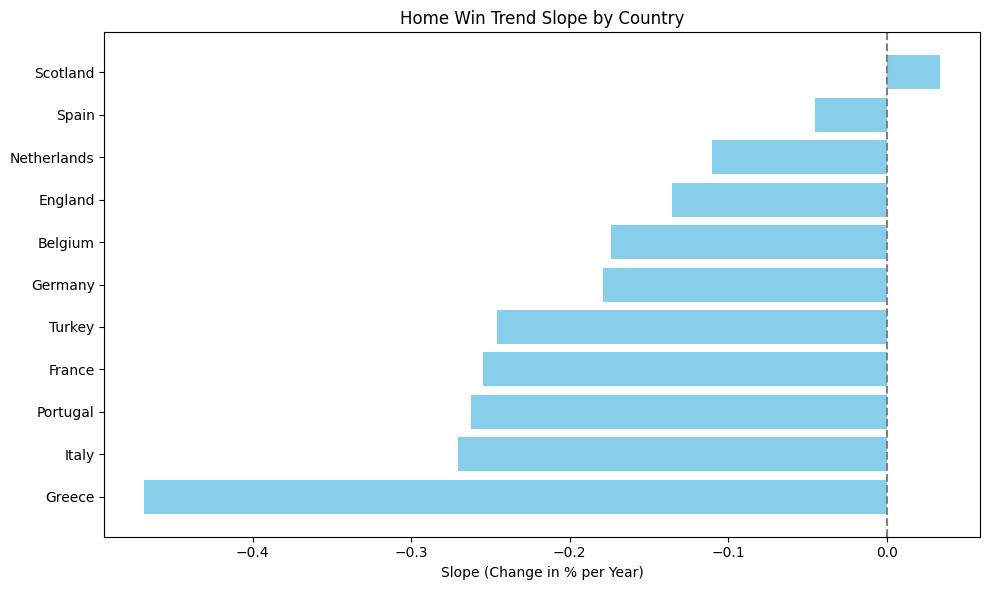

In [54]:
import matplotlib.pyplot as plt

# Convert to Series and sort
trend_series = pd.Series(country_trends).sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(trend_series.index, trend_series.values, color='skyblue')
plt.axvline(0, color='gray', linestyle='--')  # Zero line
plt.title('Home Win Trend Slope by Country')
plt.xlabel('Slope (Change in % per Year)')
plt.tight_layout()
plt.show()